<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 10 - Continuación con Redes Neuronales Multicapa.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. ¿Qué tan robusto es tu modelo?

Ayer comprobamos que haciendo uso de simple Red Neuronal Multicapa podemos obtener un buen rendimiento (aprox. 96%) de acierto en la predicción de números de MNIST. Pero... ¿Qué tan robusto es tu modelo? O dicho de otra manera, ¿cómo se ven afectadas las predicciones de tu modelo cuándo aparecen variaciones en tus datos de entrada?.

Es decir, imagínate que las imágenes que le pasamos al modelo, se generan a partir de tomar una foto al dígito escrito manualmente con tu movil. Es probable que algunas de las fotos que queramos predecir no estén centradas (ej. a) o no correctamente alineadas (ej. b) o sufran de mala calidad (ej. c). ¿Crees que esto puede afectar al rendimiento de tu modelo?

> ![texto alternativo](https://i.imgur.com/qs86wF1.jpg)

---

**Tu tarea:** Copia el código implementado ayer en Keras que entrena a tu red neuronal para predecir valores del dataset MNIST. Una vez lo tengas entrenado, realiza lo siguiente:

1. Utiliza tu código de ayer para entrenar a una Red Neuronal Multicapa que sea capaz de clasificar los números del dataset MNIST del 0 al 9. Como ya hemos visto, subdivide tus datos en ***train_set*** y ***test_set***, y utiliza el primero para el entrenamiento. (**bonus**) ¿Es necesario reentrenar siempre que quieras utilizar tu modelo? Investiga si hay alguna forma de guardar tus modelos entrenados, para así volver a cargarlos en un futuro cuando quieras utilizarlo. 
2. Ahora, con tu red entrenado, utiliza tu ***test_set*** para evaluar el modelo. Después, usa tu  ***test_set*** para generar tres test de pruebas diferentes que incluyan las distorsiones que hemos mencionado antes (translaciones, rotaciones, y ruido 25% y ruido 50%). Por ejemplo, una translación la puedes conseguir cogiendo el vector de entrada de una de las imágenes, y eliminando columnas por la derecha/izquierda y arriba/abajo de la imagen, y rellenando con 0s las nuevas zonas de la imagen (o directamente usando las bondades de ***scipy.ndimage.shift()***). Una rotación es más compleja, pero por suerte scipy incluye funcionalidades que te pueden facilitar el trabajo (ej. ***scipy.ndimage.rotate()***). Finalmente, añadir ruido es simplemente, sumar a cada uno de los píxeles de tu imagen valores aleatorios (controla que en cualquier caso la intensidad de los píxeles se mantenga en el rango de valores esperados). Consigue que en cada dataset el grado de distorsión (ej. grado de inclinación) varíe por imagen. Visualiza algunas de estas imágenes distorsionadas.

> **En traslación no cortes más del 25% de la imagen por cada eje. En rotación no rotes más de 90º. En ruido, añade una cantidad máxima de ruido de +-0.25 y +-0.5 (25% Ruido y 50% Ruido).**

3. Antes de evaluar tus datasets distorsionados, entendiendo el funcionamiento de la arquitectura de la Red Neuronal Multicapa ¿Cómo esperas que se va a comportar tu modelo?¿Será robusto frente a estas distorsiones?

4. Evalua las predicciones para cada uno de los datasets distorsionados y compara los resultados obtenidos. ¿Se te ocurre alguna forma de evitar esto?

5. Utiliza la mismas funciones que has utilizado para distorsionar tus imágenes y genera imágenes distorsionadas de los elementos de tu ***training_set***. Genera con todas estas imágenes y las originales en tu ***training_set*** un nuevo ***training_set*** aumentado (a este proceso se le denomina ***Data Augmentation***). Reentrena a tu modelo nuevamente con este training_set aumentado y obtén evaluaciones de nuevo de los ***test_set distorsionados*** que habíamos generado previamente. ¿Se comprueba una mejora de tu módelo? ¿Hemos necesitado invertir esfuerzos en conseguir nuevos datos originales?

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).values

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

In [0]:
!mkdir models

In [0]:
import tensorflow as tf

from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255
Yt = to_categorical(Y, 10)

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

# Reseteamos el grafo de operaciones.
tf.reset_default_graph()

# Utilizamos Sesiones interactivas para
# ahorrarnos especificar que sesión vamos
# a utilizar.
sess = tf.InteractiveSession()

model = Sequential()

model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=SGD(lr=0.15), loss="categorical_crossentropy", metrics=["acc"])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=20, epochs=30)

model.save("models/model1.h5")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Train on 14000 samples, validate on 6000 samples
Epoch 1/30
14000/14000 [==============================] - 3s 211us/sample - loss: 0.5268 - acc: 0.8323 - val_loss: 0.2465 - val_acc: 0.9270
Epoch 2/30
14000/14000 [==============================] - 3s 207us/sample - loss: 0.2011 - acc: 0.9376 - val_loss: 0.2103 - val_acc: 0.9377
Epoch 3/30
14000/14000 [==============================] - 3s 188us/sample - loss: 0.1372 - acc: 0.9582 - val_loss: 0.2082 - val_acc: 0.9417
Epoch 4/30
14000/14000 [==============================] - 3s 180us/sample - loss: 0.1007 - acc: 0.9689 - val_loss: 0.1747 - val_acc: 0.9530
Epoch 5/30
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0791 - acc: 0.9741 - val_loss: 0.1698 - val_acc: 0.9540
Epoch 6/30
14000/14000 [==============================] - 3s 179us/sample - loss: 0.0626 - acc: 0.9796 - val_loss: 0.1623 - val_acc: 0.9552
Epoch 7/30
14000/14000 [==============================] - 3s 182us/sample - loss: 0.0495 - acc: 0.9833 - val_lo

In [0]:
def getShiftedData(entry_data):
  shifted = []

  for image in entry_data.reshape(entry_data.shape[0], 28, 28):    
    shifted.append(shift(image, np.random.randint(-7, 7)))
    
  return np.array(shifted).reshape(entry_data.shape)

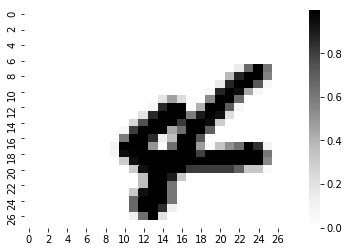

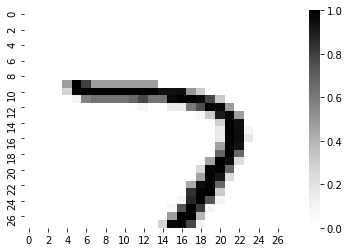

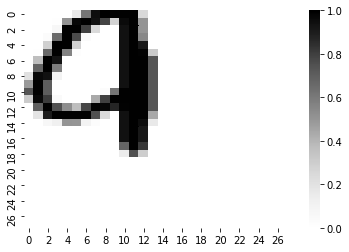

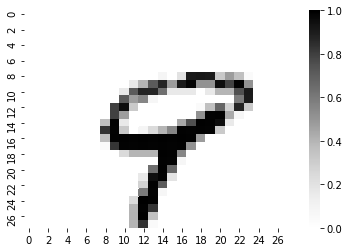

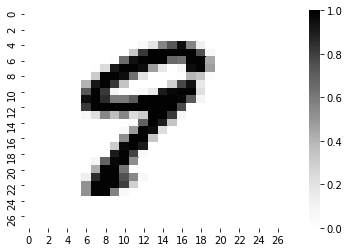

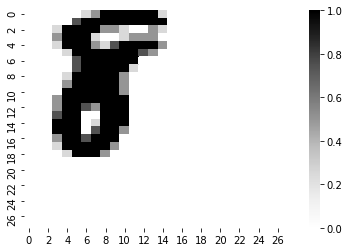

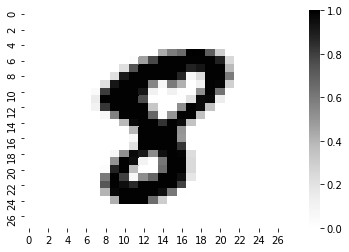

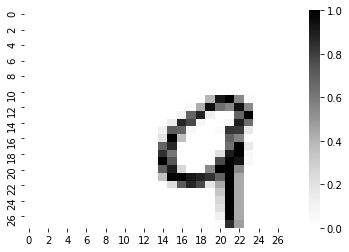

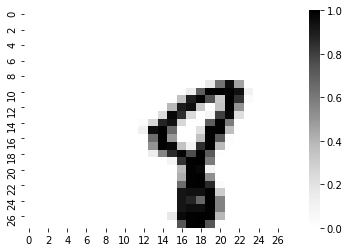

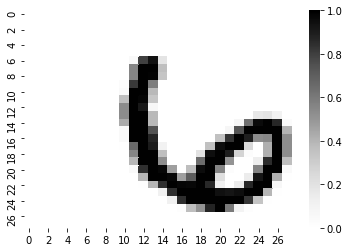

In [0]:
from tensorflow.keras.models import load_model
from scipy.ndimage import shift, rotate

def showNumber(image):  
    sb.heatmap(image, cmap="Greys")
    plt.show()

model = load_model("models/model1.h5")

X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28)
# print(X_test_reshaped.shape)

X_test_shifted = []

for image in X_test_reshaped:    
  X_test_shifted.append(shift(image, np.random.randint(-7, 7)))

# showNumber(X_test_reshaped[0])

for number in X_test_shifted[:10]:
  showNumber(number)
  
X_test_shifted = np.array(X_test_shifted).reshape(X_test.shape)





In [0]:
def getRotatedData(entry_data):
  rotated = []
  
  for image in entry_data.reshape(entry_data.shape[0], 28, 28):
    rotated.append(rotate(image, np.random.randint(-90, 90), reshape=False,
                          prefilter=False, order=2))
  
  return np.array(rotated).reshape(entry_data.shape)
  

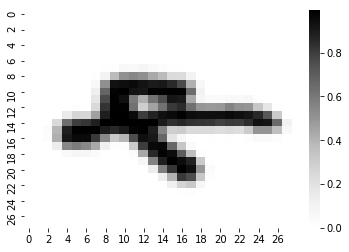

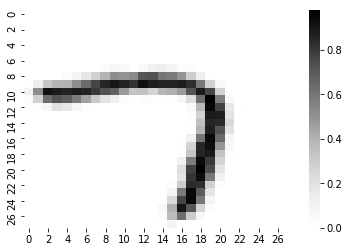

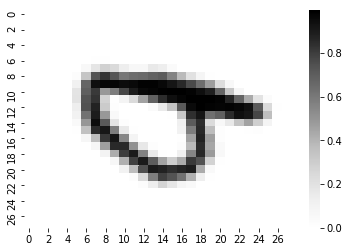

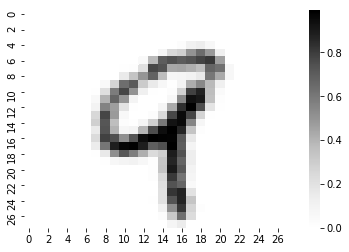

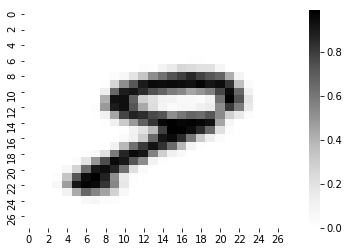

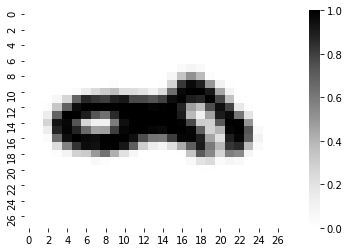

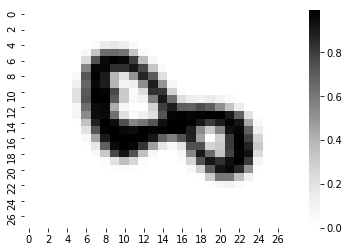

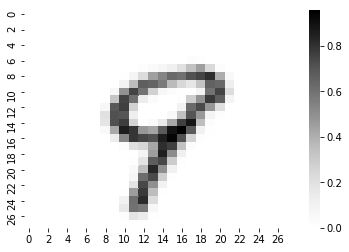

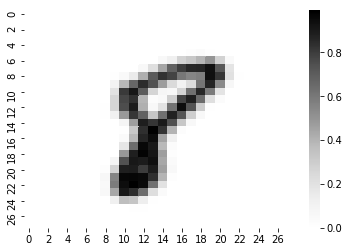

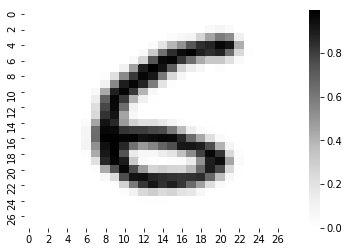

In [0]:
X_test_rotated = []

for image in X_test_reshaped:    
  X_test_rotated.append(rotate(image, np.random.randint(-90, 90), reshape=False, prefilter=False, order=2))
  
for number in X_test_rotated[:10]:
  showNumber(number)
  
X_test_rotated = np.array(X_test_rotated).reshape(X_test.shape)

In [0]:
def get_noisy_data(entry_data):
  noisy_25 = []
  noisy_50 = []
  
  for image_array in entry_data:
    noisy_image = image_array + np.random.random((28 * 28))*0.25  
    noisy_25.append((noisy_image/np.max(noisy_image)))
    noisy_image = image_array + np.random.random((28 * 28))*0.5  
    noisy_50.append((noisy_image/np.max(noisy_image)))
    
  return np.array(noisy_25), np.array(noisy_50)

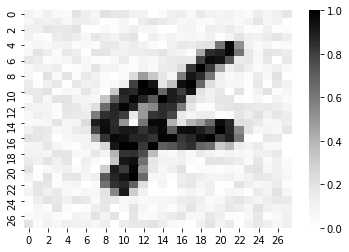

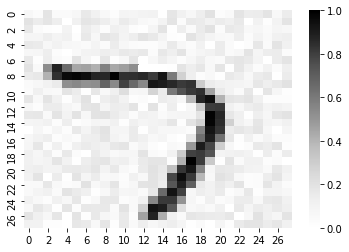

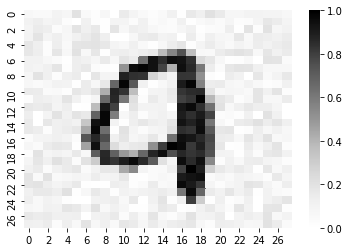

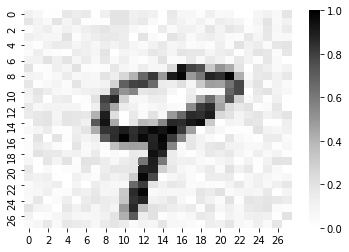

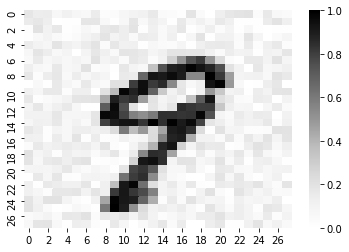

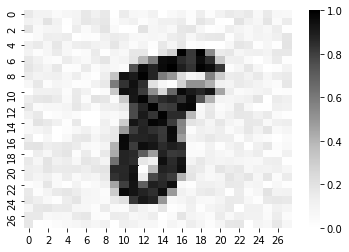

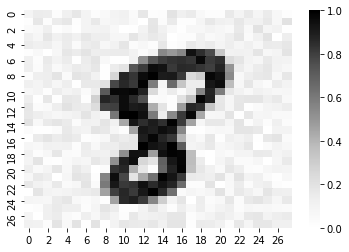

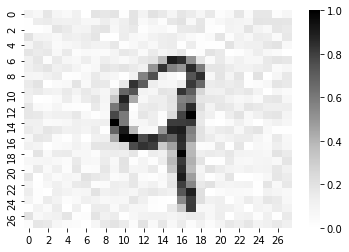

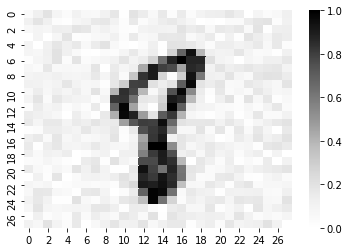

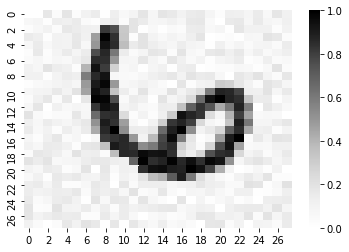

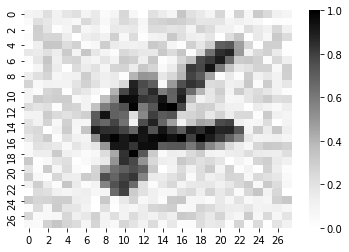

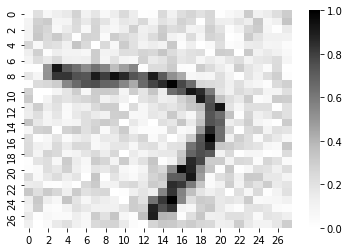

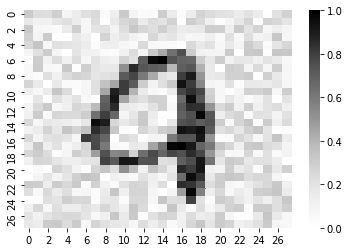

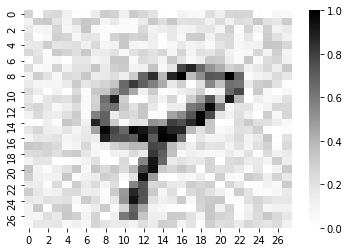

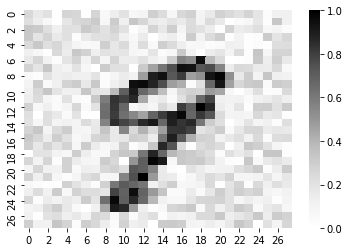

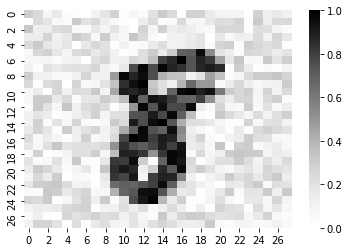

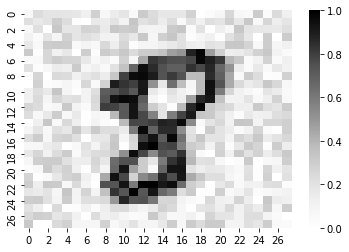

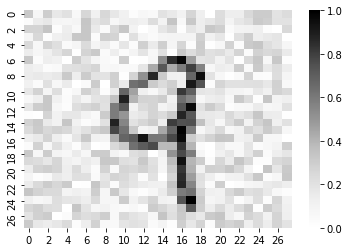

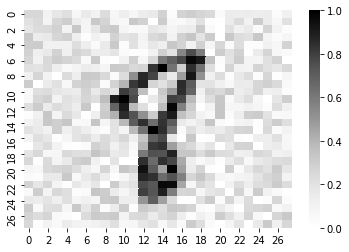

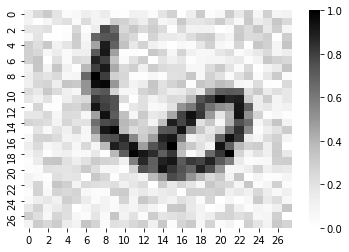

In [0]:
X_test_noisy25 = []
X_test_noisy50 = []

for image_array in X_test:
  noisy_image = image_array + np.random.random((28 * 28))*0.25  
  X_test_noisy25.append((noisy_image/np.max(noisy_image)))
  noisy_image = image_array + np.random.random((28 * 28))*0.5  
  X_test_noisy50.append((noisy_image/np.max(noisy_image)))

X_test_noisy25 = np.array(X_test_noisy25)
X_test_noisy50 = np.array(X_test_noisy50)
  
X_test_noisy25_show = np.array(X_test_noisy25).reshape(X_test.shape[0], 28, 28)
X_test_noisy50_show = np.array(X_test_noisy50).reshape(X_test.shape[0], 28, 28)
    
for image in X_test_noisy25_show[:10]:
  showNumber(image)

for image in X_test_noisy50_show[:10]:
  showNumber(image)
    




In [0]:
print("Números desplazados.\n------------------------")
model.evaluate(X_test_shifted, Y_test)
print("Números rotados.\n------------------------")
model.evaluate(X_test_rotated, Y_test)
print("Números con 25% de ruido.\n------------------------")
model.evaluate(X_test_noisy25, Y_test)
print("Números con 50% de ruido.\n------------------------")
model.evaluate(X_test_noisy50, Y_test)

Números desplazados.
------------------------
6000/6000 [==============================] - 0s 70us/sample - loss: 7.1400 - acc: 0.3177
Números rotados.
------------------------
6000/6000 [==============================] - 0s 69us/sample - loss: 5.2312 - acc: 0.4875
Números con 25% de ruido.
------------------------
6000/6000 [==============================] - 0s 69us/sample - loss: 0.1921 - acc: 0.9542
Números con 50% de ruido.
------------------------
6000/6000 [==============================] - 0s 67us/sample - loss: 0.6846 - acc: 0.8223


[0.6845800100962321, 0.82233334]

In [0]:
noisy25, noisy50 = get_noisy_data(X_train)
X_train_extended = np.concatenate((X_train, getShiftedData(X_train), getRotatedData(X_train),
                noisy25, noisy50), axis=0)
Y_train_extended = np.concatenate((Y_train, Y_train, Y_train, Y_train, Y_train), axis=0)

test_noisy25, test_noisy50 = get_noisy_data(X_test)
X_test_extended = np.concatenate((X_test, getShiftedData(X_test), getRotatedData(X_test),
               test_noisy25, test_noisy50), axis=0)
Y_test_extended = np.concatenate((Y_test, Y_test, Y_test, Y_test, Y_test), axis=0)

# Reseteamos el grafo de operaciones.
tf.reset_default_graph()

# Utilizamos Sesiones interactivas para
# ahorrarnos especificar que sesión vamos
# a utilizar.
sess = tf.InteractiveSession()

model = Sequential()

model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=SGD(lr=0.15), loss="categorical_crossentropy", metrics=["acc"])

model.fit(X_train_extended, Y_train_extended,
          validation_data=(X_test_extended, Y_test_extended), batch_size=20,
          epochs=30)

model.save("models/model_extended.h5")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Train on 70000 samples, validate on 30000 samples
Epoch 1/30
70000/70000 [==============================] - 13s 191us/sample - loss: 0.5762 - acc: 0.8128 - val_loss: 0.3660 - val_acc: 0.8906
Epoch 2/30
70000/70000 [==============================] - 13s 181us/sample - loss: 0.2571 - acc: 0.9188 - val_loss: 0.2865 - val_acc: 0.9151
Epoch 3/30
70000/70000 [==============================] - 12s 178us/sample - loss: 0.1755 - acc: 0.9447 - val_loss: 0.2580 - val_acc: 0.9232
Epoch 4/30
70000/70000 [==============================] - 12s 178us/sample - loss: 0.1372 - acc: 0.9559 - val_loss: 0.2652 - val_acc: 0.9272
Epoch 5/30
70000/70000 [==============================] - 12s 178us/sample - loss: 0.1073 - acc: 0.9653 - val_loss: 0.2254 - val_acc: 0.9359
Epoch 6/30
70000/70000 [==============================] - 12s 178us/sample - loss: 0.0878 - acc: 0.9714 - val_loss: 0.2589 - val_acc: 0.9291
Epoch 7/30
70000/70000 [==============================] - 13s 182us/sample - loss: 0.0724 - acc: 0.9763 

In [0]:
model = load_model("models/model_extended.h5")
print("Números desplazados.\n------------------------")
model.evaluate(getShiftedData(X_test), Y_test)
print("------------------------\nNúmeros rotados.\n------------------------")
model.evaluate(getRotatedData(X_test), Y_test)

noisy_test_25, noisy_test_50 = get_noisy_data(X_test)

print("------------------------\nNúmeros con 25% de ruido.\n------------------------")
model.evaluate(noisy_test_25, Y_test)
print("------------------------\nNúmeros con 50% de ruido.\n------------------------")
model.evaluate(noisy_test_50, Y_test)

Números desplazados.
------------------------
6000/6000 [==============================] - 0s 65us/sample - loss: 0.5322 - acc: 0.9093
------------------------
Números rotados.
------------------------
6000/6000 [==============================] - 0s 56us/sample - loss: 0.4688 - acc: 0.9243
------------------------
Números con 25% de ruido.
------------------------
6000/6000 [==============================] - 0s 50us/sample - loss: 0.2010 - acc: 0.9688
------------------------
Números con 50% de ruido.
------------------------
6000/6000 [==============================] - 0s 54us/sample - loss: 0.2079 - acc: 0.9660


[0.20789104211893633, 0.966]

## 2. Analizando datos anteriores con Keras

Ya que tenemos los conocimientos básicos para diseñar nuestras propias Redes Neuronales Multicapa con Keras, vamos a probar qué tan bien funciona las redes neuronales para los datos que analizamos la primera semana del Dataset de cancer de pecho (Exerc. 4 - Regresión Polinomial). Recordarás que probamos diferentes alternativas y obtuvimos en torno a un 95% de accuracy. ¿Obtendremos un mejor resultado con una Red Neuronal?


---

**Tarea:** Diseña y entrena una Red Neuronal sobre el Wisconsin Breast Cancer dataset. Puedes reutilizar mucho del código desarollado en aquel ejercicio para el preprocesamiento de los datos. Sin embargo, suminístrale a la red neuronal todas las variables sin aplicar la reducción de dimensionalidad (PCA) vista posteriormente. Evalua el modelo y compáralo con las evaluaciones obtenidas en aquél ejercicio. Una vez finalizado, puedes probar a reducir la dimensionalidad de las variables con PCA y comparar los resultados.


In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

cancer_data = pd.read_csv("./data.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

# Guardamos el nombre de las columnas.
cols = X.columns

Xt = sk.preprocessing.scale(X.values)

print(Y.shape)

# COMIENZA AQUÍ TU CÓDIGO #

X_train, X_test, Y_train, Y_test = train_test_split(Xt, Y, train_size=0.7)


model = Sequential()

model.add(Dense(16, input_dim=30, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=SGD(lr=0.05), loss="mse", metrics=["acc"])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=20, epochs=50)

model.save("models/model_breast_cancer.h5")



In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

cancer_data = pd.read_csv("./data.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

# Guardamos el nombre de las columnas.
cols = X.columns

Xt = sk.preprocessing.scale(X.values)
PCA = PCA(0.9999)

X_PCA = PCA.fit_transform(Xt)

print(X_PCA.shape)

# COMIENZA AQUÍ TU CÓDIGO #

X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, Y, train_size=0.7)


model = Sequential()

model.add(Dense(16, input_dim=X_PCA.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=SGD(lr=0.05), loss="mse", metrics=["acc"])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=20, epochs=100)

model.save("models/model_breast_cancer_PCA.h5")

(569, 27)
Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 663us/sample - loss: 0.2295 - acc: 0.7111 - val_loss: 0.2062 - val_acc: 0.9006
Epoch 2/100
398/398 [==============================] - 0s 178us/sample - loss: 0.1934 - acc: 0.8744 - val_loss: 0.1707 - val_acc: 0.9298
Epoch 3/100
398/398 [==============================] - 0s 193us/sample - loss: 0.1610 - acc: 0.8894 - val_loss: 0.1325 - val_acc: 0.9591
Epoch 4/100
398/398 [==============================] - 0s 214us/sample - loss: 0.1281 - acc: 0.9095 - val_loss: 0.0957 - val_acc: 0.9649
Epoch 5/100
398/398 [==============================] - 0s 179us/sample - loss: 0.0992 - acc: 0.9196 - val_loss: 0.0687 - val_acc: 0.9708
Epoch 6/100
398/398 [==============================] - 0s 180us/sample - loss: 0.0789 - acc: 0.9271 - val_loss: 0.0516 - val_acc: 0.9708
Epoch 7/100
398/398 [==============================] - 0s 178us/sample - loss: 0.0651 - acc: 0.9347 - val_loss: 0.0405 - v